In [1]:
from CSR import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
def plot_2D_contour(x, y, z):
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    norm = colors.TwoSlopeNorm( vcenter=0)
    surf = ax.imshow(z, extent=(min(x), max(x), min(y), max(y)), origin='lower',  cmap='seismic',aspect='auto', norm = norm)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    

    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('x ($ \mu m$)')
    plt.ylabel('z ($ m$)')
    return ax

In [3]:
DtestCSR = CSR2D(input_file= 'input/dipole_config.yaml')


In [4]:
DtestCSR.CSR_params.compute_CSR = 0

In [5]:
DtestCSR.run(stop_time  = 2.5)

Finish step 2 in 0.25755739212036133 seconds
Finish step 3 in 0.2812936305999756 seconds
Finish step 4 in 0.282564640045166 seconds
Finish step 5 in 0.2843494415283203 seconds
Finish step 6 in 0.2628207206726074 seconds
Finish step 7 in 0.30209875106811523 seconds
Finish step 8 in 0.2880115509033203 seconds
Finish step 9 in 0.2949390411376953 seconds
Finish step 10 in 0.2923150062561035 seconds
Finish step 11 in 0.3087310791015625 seconds
Finish step 12 in 0.37273573875427246 seconds
Finish step 13 in 0.3500642776489258 seconds
Finish step 14 in 0.3548610210418701 seconds
Finish step 15 in 0.3420701026916504 seconds
Finish step 16 in 0.3463859558105469 seconds
Finish step 17 in 0.31362223625183105 seconds
Finish step 18 in 0.3269047737121582 seconds
Finish step 19 in 0.3184471130371094 seconds
Finish step 20 in 0.3298976421356201 seconds
Finish step 21 in 0.3551795482635498 seconds
Finish step 22 in 0.29478001594543457 seconds
Finish step 23 in 0.2874937057495117 seconds
Finish step 24

In [13]:
t = DtestCSR.beam.position
print(t)
s  = t -0*DtestCSR.beam.sigma_z
x = (s-t)*DtestCSR.beam.slope[0]


2.4499999999999993


## plot near singularity

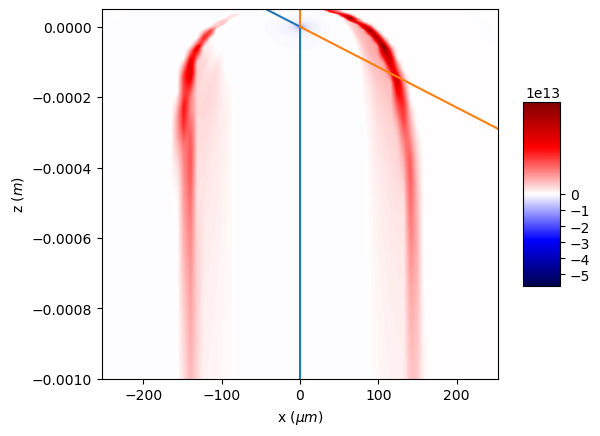

In [14]:
sp = np.linspace(s- 0.001, s + 0.00005, 1000)
sigx = DtestCSR.beam.sigma_x
xL = x -3*sigx
xR = x + 3*sigx
xp = np.linspace(xL, xR, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 - t))
ax.plot(xp2*1e6, (sp2 - t))

## plot who range

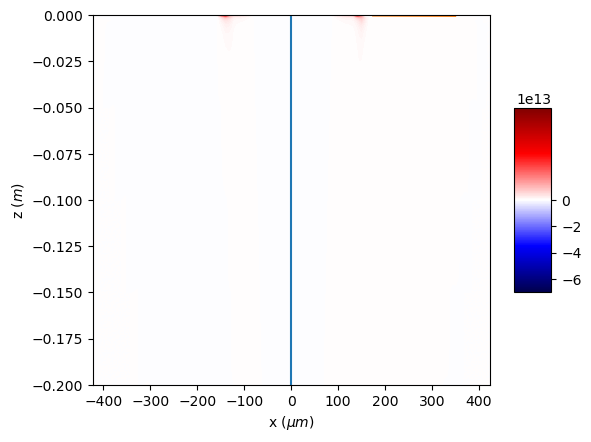

In [15]:
sp = np.linspace(s- 0.2, s + 0.0, 1000)
sigx = DtestCSR.beam.sigma_x
xL = x -5*sigx
xR = x + 5*sigx
xp = np.linspace(xL, xR, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 - t))
ax.plot(xp2*1e6, (sp2 - t))

## Plot area 1

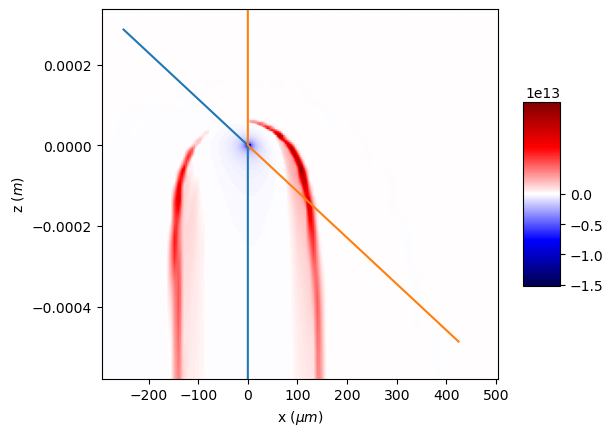

In [21]:
DtestCSR.formation_length = 0.4

tan_a = DtestCSR.beam.slope[0]
tan_theta = -2*tan_a/(1-tan_a**2)
dz = np.abs(10*DtestCSR.beam.sigma_x/tan_theta)

sp = np.linspace(np.max((s - DtestCSR.formation_length, 0)), s + 5*DtestCSR.beam.sigma_z, 100000)
xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)
ind  = (np.abs(xp1) < 6*DtestCSR.beam.sigma_x) &(np.abs(xp2) < 6*DtestCSR.beam.sigma_x)

if sum(ind) == len(xp1):   # The two region are parallel and not tilted
    xmin = x - 5*DtestCSR.beam.sigma_x
    xmax = x + 5*DtestCSR.beam.sigma_x
    smin = s - 5*DtestCSR.beam.sigma_z
    smax = s + 5*DtestCSR.beam.sigma_z

else:
    xp1_valid = xp1[ind]
    xp2_valid = xp2[ind]
    sp_valid = sp[ind]
    smin = np.min(sp_valid)
    smax = np.max(sp_valid)
    xmin = np.min((np.min(xp1_valid), np.min(xp2_valid)))
    xmax = np.max((np.max(xp1_valid), np.max(xp2_valid)))


sp = np.linspace(smin, smax, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 - t))
ax.plot(xp2*1e6, (sp2 - t))

## Plot area 2

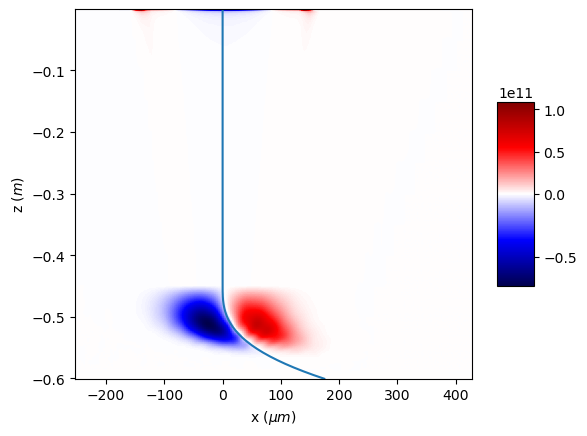

In [20]:

sp = np.linspace(smin - 1.5*DtestCSR.formation_length, smin, 200)
xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

xL = np.min(xp1) - 3*DtestCSR.beam.sigma_x
xR = np.max(xp1) + 3*DtestCSR.beam.sigma_x




xp = np.linspace(xL  , xR, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')



sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 - t))

## Plot area 1 method 2

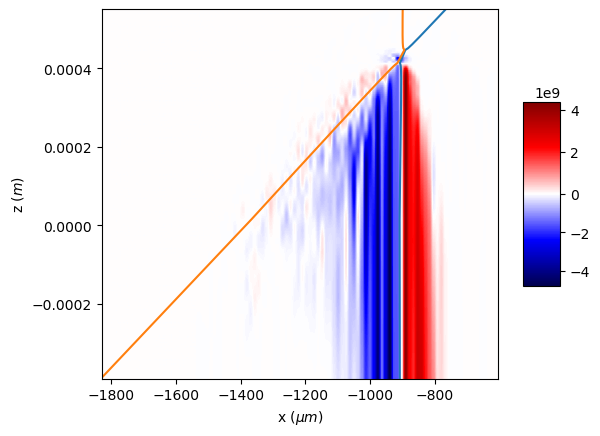

In [22]:
tan_a = DtestCSR.beam.slope[0]
tan_theta = -2*tan_a/(1-tan_a**2)
dz = 3*DtestCSR.beam.sigma_x/np.abs(tan_theta)
x1 = x + dz*tan_theta
if tan_theta > 0:
    x2 = x - DtestCSR.beam.sigma_x
    xmin, xmax = x2, x1
else:
    x2 = x + DtestCSR.beam.sigma_x
    xmin, xmax = x1, x2

s1 = s -dz

s2 = s + DtestCSR.beam.sigma_z




    



sp = np.linspace(s1, s2, 200)
xp = np.linspace(xmin, xmax, 100)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 - t))
ax.plot(xp2*1e6, (sp2 - t))